In [3]:
#importing libraries and givig request to the site
import requests
import pandas as pd
from io import StringIO

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
response = requests.get(url)

if response.status_code == 200:
    data = StringIO(response.text)
    df = pd.read_csv(data)
    print("Dataset loaded successfully!")
    print(df.head())
else:
    print("Failed to fetch data. Status code:", response.status_code)

Dataset loaded successfully!
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  

In [4]:
#analysing the dataset
india_df = df.loc[df["location"]=="India"].copy()
print(india_df.head())
print(india_df.shape)

       iso_code continent location        date  total_cases  new_cases  \
173549      IND      Asia    India  2020-01-05          0.0        0.0   
173550      IND      Asia    India  2020-01-06          0.0        0.0   
173551      IND      Asia    India  2020-01-07          0.0        0.0   
173552      IND      Asia    India  2020-01-08          0.0        0.0   
173553      IND      Asia    India  2020-01-09          0.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
173549                 NaN           0.0         0.0                  NaN   
173550                 NaN           0.0         0.0                  NaN   
173551                 NaN           0.0         0.0                  NaN   
173552                 NaN           0.0         0.0                  NaN   
173553                 NaN           0.0         0.0                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
173549  ...

In [11]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
#importing library
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#coverting the datetime
india_df["date"] = pd.to_datetime(india_df["date"])

# Fill missing values ONLY for numeric columns
num_cols = india_df.select_dtypes(include=np.number).columns
india_df[num_cols] = india_df[num_cols].fillna(0)

# Check missing values
india_df.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
population                                 0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64

In [18]:
india_df=india_df.drop_duplicates() #droping missing values
india_df.sort_values("date") #sorting the dates

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
173550,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
173551,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
173552,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
173553,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175226,IND,Asia,India,2024-08-08,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
175227,IND,Asia,India,2024-08-09,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
175228,IND,Asia,India,2024-08-10,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
175229,IND,Asia,India,2024-08-11,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0


In [9]:
#creating new columns for new cases and deaths
india_df["daily_cases"] = india_df["total_cases"].diff().fillna(0)
india_df["daily_deaths"] = india_df["total_deaths"].diff().fillna(0)

In [21]:
india_df["daily_cases"]=india_df["daily_cases"].clip(lower=0)
india_df["daily_deaths"]=india_df["daily_deaths"].clip(lower=0)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [11]:
india_df = india_df.sort_values("date")
india_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,daily_cases,daily_deaths
173549,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0
173550,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0
173551,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0
173552,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0
173553,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175226,IND,Asia,India,2024-08-08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0
175227,IND,Asia,India,2024-08-09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0
175228,IND,Asia,India,2024-08-10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0
175229,IND,Asia,India,2024-08-11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
india_df["cases_7day_avg"] = india_df["new_cases"].rolling(7).mean()

In [13]:
vacc_cols = ["total_vaccinations", "people_vaccinated", "people_fully_vaccinated"]
india_df[vacc_cols] = india_df[vacc_cols].fillna(0)

In [15]:
case_cols = ["total_cases", "total_deaths"]
india_df[case_cols] = india_df[case_cols].ffill()

In [17]:
india_df = india_df.fillna(0)
india_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,daily_cases,daily_deaths,cases_7day_avg
173549,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
173550,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
173551,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
173552,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
173553,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175226,IND,Asia,India,2024-08-08,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,44.714286
175227,IND,Asia,India,2024-08-09,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,44.714286
175228,IND,Asia,India,2024-08-10,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,44.714286
175229,IND,Asia,India,2024-08-11,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [18]:
print("Total missing values:", india_df.isnull().sum().sum())
print("Duplicate rows:", india_df.duplicated().sum())
print("Shape:", india_df.shape)
india_df.head()

Total missing values: 0
Duplicate rows: 0
Shape: (1682, 70)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,daily_cases,daily_deaths,cases_7day_avg
173549,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173550,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173551,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173552,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173553,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,69.66,0.64,1417173120,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#keep only the important columns
final_df = india_df[[
    "date",
    "total_cases", "new_cases", "cases_7day_avg",
    "total_deaths", "new_deaths",
    "total_vaccinations", "people_vaccinated", "people_fully_vaccinated",
    "population"
]].copy()

final_df.head()

,date,total_cases,new_cases,cases_7day_avg,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population
173549,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1417173120
173550,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1417173120
173551,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1417173120
173552,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1417173120
173553,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1417173120


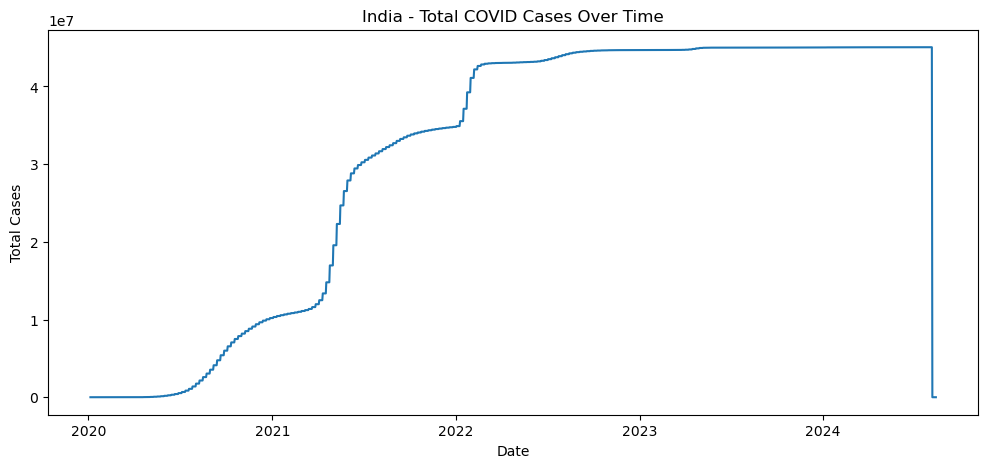

In [20]:
#total case vs date
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(final_df["date"], final_df["total_cases"])
plt.title("India - Total COVID Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

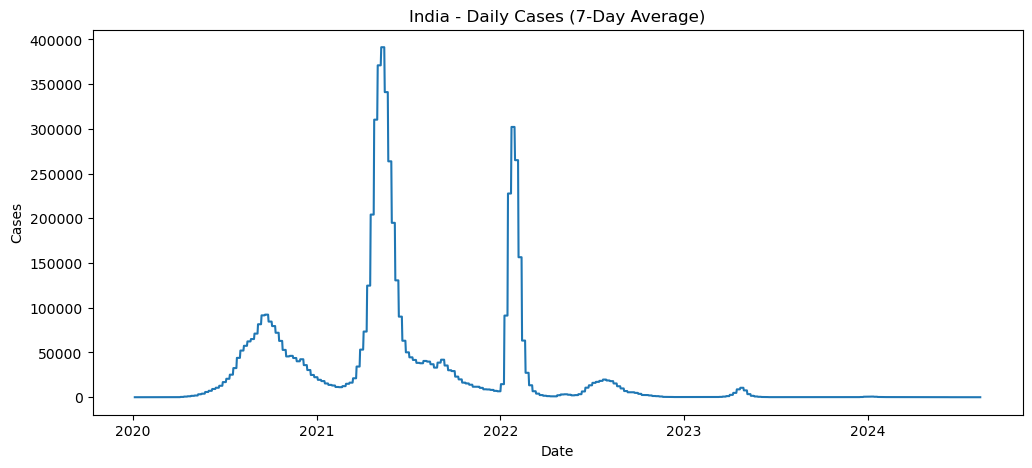

In [21]:
#daily cases
plt.figure(figsize=(12,5))
plt.plot(final_df["date"], final_df["cases_7day_avg"])
plt.title("India - Daily Cases (7-Day Average)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()

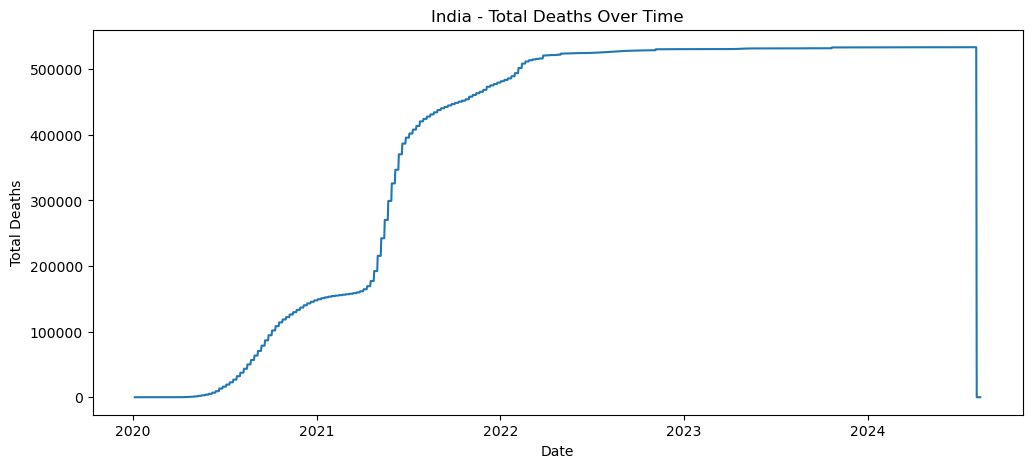

In [22]:
#total deaths
plt.figure(figsize=(12,5))
plt.plot(final_df["date"], final_df["total_deaths"])
plt.title("India - Total Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.show()

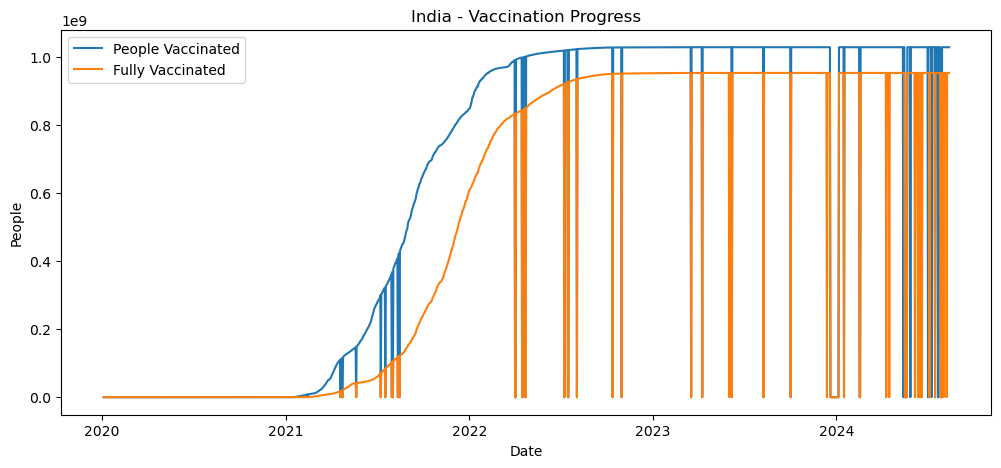

In [23]:
#vaccination progress
plt.figure(figsize=(12,5))
plt.plot(final_df["date"], final_df["people_vaccinated"], label="People Vaccinated")
plt.plot(final_df["date"], final_df["people_fully_vaccinated"], label="Fully Vaccinated")
plt.title("India - Vaccination Progress")
plt.xlabel("Date")
plt.ylabel("People")
plt.legend()
plt.show()

In [24]:
#peak daily cases
peak_row = final_df.loc[final_df["cases_7day_avg"].idxmax()]
peak_row

date                       2021-05-09 00:00:00
total_cases                         22296414.0
new_cases                            2738957.0
cases_7day_avg                   391279.571429
total_deaths                          242362.0
new_deaths                             26820.0
total_vaccinations                 168304868.0
people_vaccinated                  133854676.0
people_fully_vaccinated             34450192.0
population                          1417173120
Name: 174039, dtype: object

In [26]:
#peak daily deaths
peak_death_row = final_df.loc[final_df["new_deaths"].idxmax()]
peak_death_row

date                       2021-05-23 00:00:00
total_cases                         26530132.0
new_cases                            1846055.0
cases_7day_avg                   263722.142857
total_deaths                          299266.0
new_deaths                             28982.0
total_vaccinations                 191719240.0
people_vaccinated                  150033188.0
people_fully_vaccinated             41686052.0
population                          1417173120
Name: 174053, dtype: object

In [27]:
#exporting cleaned dataset
final_df.to_csv("india_covid_cleaned.csv", index=False)
print("Saved as india_covid_cleaned.csv")

Saved as india_covid_cleaned.csv
